<a href="https://colab.research.google.com/github/MePrince47/Tp-nzekon/blob/main/Copie_okok_ok_ok_de_Bienvenue_dans_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistiques pour la série 'Open':
Moyenne : 28.426478966545215
Variance : 175.75446344314594
Écart-type : 13.257241924440617


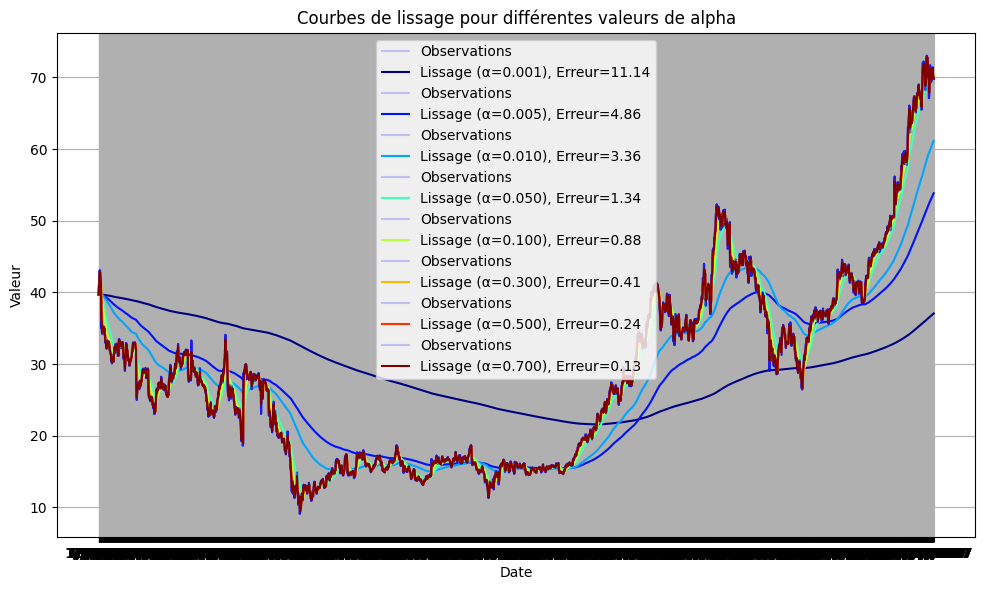

La meilleure approximation (a-hat) est: 0.4713754804548144


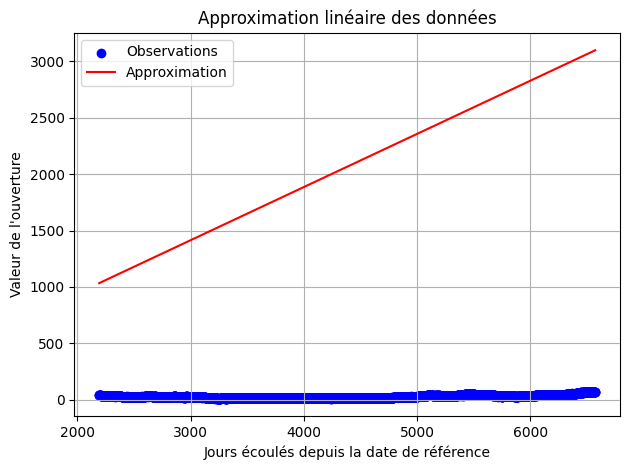

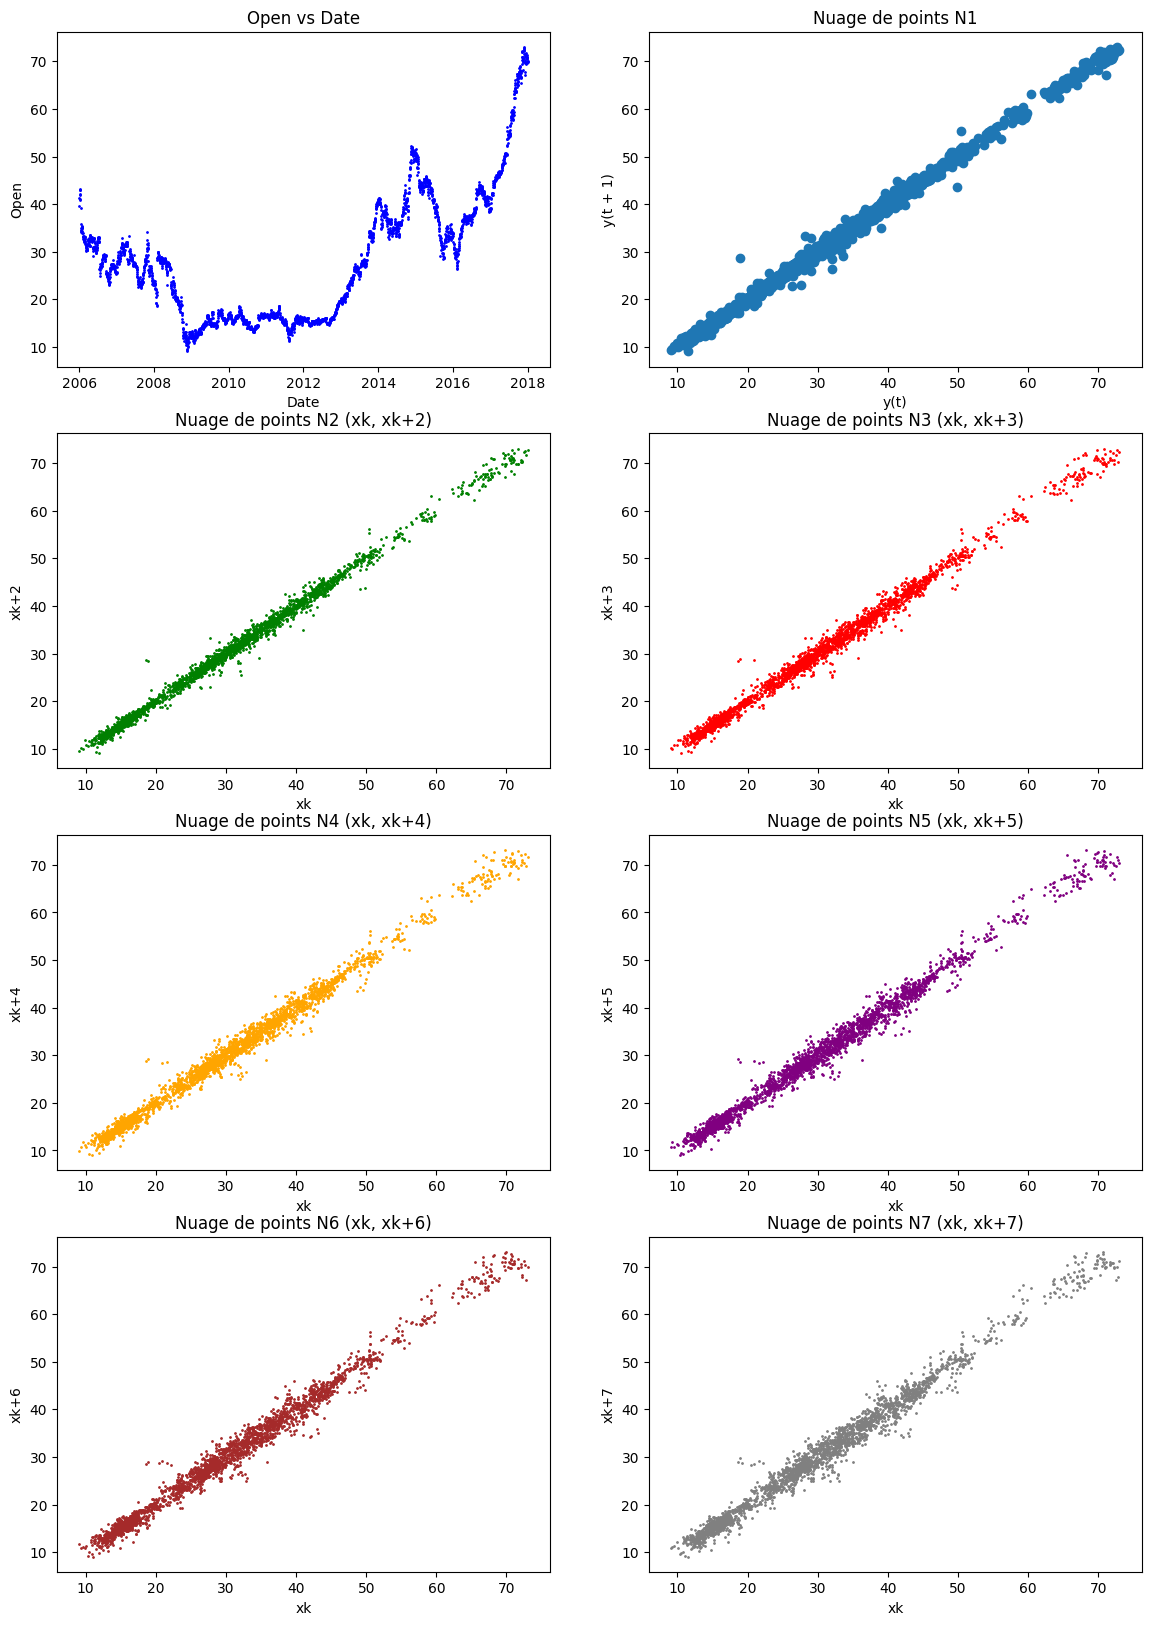

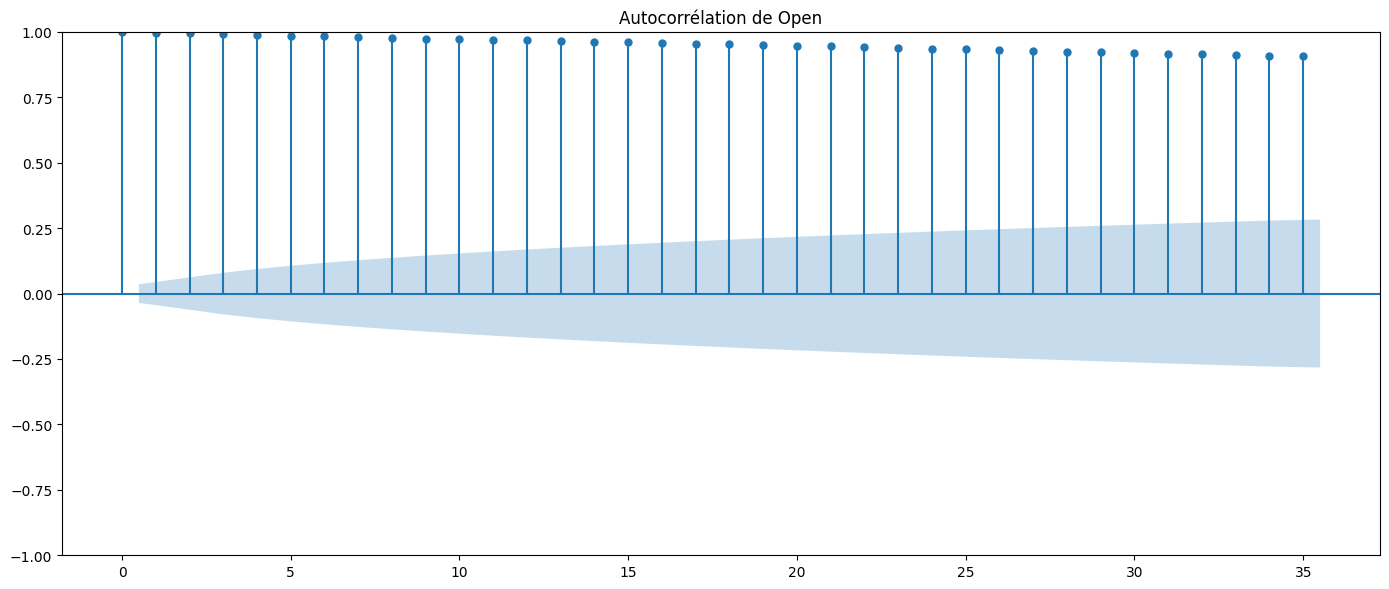

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np


# Importer le fichier CSV depuis GitHub
url = "https://raw.githubusercontent.com/rashida048/Datasets/9fefabe05e3b685bf741a25f506654adeb71ff69/stock_data.csv"
data = pd.read_csv(url)

# Calculs de la moyenne, la variance et l'écart-type pour la série 'Open'
mean_open = data['Open'].mean()
var_open = data['Open'].var()
std_open = data['Open'].std()

# Affichage des statistiques
print("Statistiques pour la série 'Open':")
print("Moyenne :", mean_open)
print("Variance :", var_open)
print("Écart-type :", std_open)


# Liste des valeurs de alpha
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7]

# Définir une palette de couleurs
colors = plt.cm.jet(np.linspace(0, 1, len(alphas)))

# Initialiser une figure
plt.figure(figsize=(10, 6))

# Boucle sur chaque valeur de alpha
for alpha, color in zip(alphas, colors):
    # Initialiser la première valeur lissée pour cette valeur de alpha
    L = [data['Open'].iloc[0]]

    # Calculer les valeurs lissées pour les observations suivantes
    for i in range(1, len(data)):
        smoothed = alpha * data['Open'].iloc[i] + (1 - alpha) * L[-1]
        L.append(smoothed)

    # Calculer l'erreur pour cette valeur de alpha
    error = np.mean(np.abs(data['Open'] - L))

    # Tracer les données d'observation
    plt.plot(data['Date'], data['Open'], label='Observations', color='blue', alpha=0.2)

    # Tracer la courbe lissée
    plt.plot(data['Date'], L, label=f'Lissage (α={alpha:.3f}), Erreur={error:.2f}', color=color)

# Ajouter des titres et des légendes
plt.title('Courbes de lissage pour différentes valeurs de alpha')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()













# Convertir les dates en objets datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculer les jours écoulés depuis une date de référence
reference_date = pd.to_datetime('2000-01-01')  # Date de référence (exemple)
data['Days'] = (data['Date'] - reference_date).dt.days

# Extraire les données
x = data['Days']
y = data['Open']

# Calculer la meilleure approximation
def calculate_best_approximation(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    a = (sum_y - b * sum_x) / n

    return a, b

a_hat, b_hat = calculate_best_approximation(x, y)

print("La meilleure approximation (a-hat) est:", a_hat)

# Tracer les données d'observation
plt.scatter(x, y, color='blue', label='Observations')

# Calculer les valeurs y pour la droite d'approximation
y_approx = a_hat * x + b_hat  # Ajouter le terme constant b_hat

# Tracer la droite d'approximation
plt.plot(x, y_approx, color='red', label='Approximation')

# Ajouter des titres et des légendes
plt.title('Approximation linéaire des données')
plt.xlabel('Jours écoulés depuis la date de référence')
plt.ylabel('Valeur de l\'ouverture')
plt.legend()

# Afficher le graphique
plt.grid(True)
plt.tight_layout()
plt.show()

















# Création des nuages de points et des graphiques d'autocorrélation pour différentes paires d'attributs
plt.figure(figsize=(14, 20))

# Courbe de points pour 'Open'
plt.subplot(4, 2, 1)
plt.scatter(data['Date'], data['Open'], color='blue', s=1)  # Ajuster la taille des points ici
plt.title('Open vs Date')
plt.xlabel('Date')
plt.ylabel('Open')

# Nuage de points N1 (xk, xk+1)
plt.subplot(4, 2, 2)
lag_plot(data['Open'], ax=plt.gca())
plt.title('Nuage de points N1')

# Nuage de points N2 (xk, xk+2)
plt.subplot(4, 2, 3)
plt.scatter(data['Open'].iloc[:-2], data['Open'].iloc[2:], color='green', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N2 (xk, xk+2)')
plt.xlabel('xk')
plt.ylabel('xk+2')

# Nuage de points N3 (xk, xk+3)
plt.subplot(4, 2, 4)
plt.scatter(data['Open'].iloc[:-3], data['Open'].iloc[3:], color='red', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N3 (xk, xk+3)')
plt.xlabel('xk')
plt.ylabel('xk+3')

# Nuage de points N4 (xk, xk+4)
plt.subplot(4, 2, 5)
plt.scatter(data['Open'].iloc[:-4], data['Open'].iloc[4:], color='orange', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N4 (xk, xk+4)')
plt.xlabel('xk')
plt.ylabel('xk+4')

# Nuage de points N5 (xk, xk+5)
plt.subplot(4, 2, 6)
plt.scatter(data['Open'].iloc[:-5], data['Open'].iloc[5:], color='purple', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N5 (xk, xk+5)')
plt.xlabel('xk')
plt.ylabel('xk+5')

# Nuage de points N6 (xk, xk+6)
plt.subplot(4, 2, 7)
plt.scatter(data['Open'].iloc[:-6], data['Open'].iloc[6:], color='brown', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N6 (xk, xk+6)')
plt.xlabel('xk')
plt.ylabel('xk+6')

# Nuage de points N7 (xk, xk+7)
plt.subplot(4, 2, 8)
plt.scatter(data['Open'].iloc[:-7], data['Open'].iloc[7:], color='gray', s=1)  # Ajuster la taille des points ici
plt.title('Nuage de points N7 (xk, xk+7)')
plt.xlabel('xk')
plt.ylabel('xk+7')

# Affichage de la courbe d'autocorrélation pour 'Open'
plt.figure(figsize=(14, 6))
plt.subplot(1, 1, 1)
plot_acf(data['Open'], ax=plt.gca(), alpha=0.05)
plt.title('Autocorrélation de Open')

plt.tight_layout()
plt.show()
